In [3]:
import numpy as np
import pyimfit
import matplotlib.pyplot as plt
import pickle

on = "J0918+1207"
with open("../../agn-result/psf_pkls/psf_"+on+".pkl","rb") as f:
    d = pickle.load(f)
epsf = d['psf'].data

In [4]:
models = {}
# Flat sky
flatsky = {'I_sky': [100.0, 0.0,500.0],}
models['FlatSkyDict'] = {'name': "FlatSky", 'label': "flat_sky", 'parameters':flatsky}

# Tilted sky plane
tiltsky = {'I_0': [100.0, 0.0,500.0], 'm_x': [1,'fixed'],'m_y':[1,'fixed']}
models['TiltedSkyPlaneDict'] = {'name': "TiltedSkyPlane", 'label': "tilt_sky", 'parameters':tiltsky}

# Gaussian - elliptical, 2d
gaussian = {'PA': [40, 0,100], 'ell': [0.5, "fixed"], 'I_0': [100.0, 0.0,500.0],
            'sigma':[5,'fixed']}
models['GaussianDict'] = {'name': "Gaussian", 'label': "gaussian", 'parameters': gaussian}

# Moffat - elliptical, 2d - beta>>1 gives gaussian, lower beta means more intense wing
moffat = {'PA': [40, 0,100], 'ell': [0.5, "fixed"], 'I_0': [100.0, 0.0,500.0],
            'fwhm':[5,'fixed'], 'beta':[5,'fixed']}
models['MoffatDict'] = {'name': "Moffat", 'label': "moffat", 'parameters': moffat}

# PSF
psf = {'I_tot' : [3000,'fixed']}
models['PointSourceDict'] = {'name': "PointSource", 'label': "psf", 'parameters': psf}

# Rot psf - Intensity not same as input
psfRot = {'I_tot' : [3000,'fixed'], 'PA':[180, 'fixed'] }
models['PointSourceRotDict'] = {'name': "PointSourceRot", 'label': "psfrot", 'parameters': psfRot}

# ModifiedKing - has core and truncation radius
modking = {'PA': [40, 0,100], 'ell':[0.5, "fixed"], 'I_0': [100.0, 0.0,500.0], 
           'r_c': [10, 0.0, 100], 'r_t':[20, 0.0, 100], 'alpha':[3,'fixed']}
models['ModifiedKingDict'] = {'name': "ModifiedKing", 'label': "modking", 'parameters': modking}

# Exponential - h is scale length
exponentialParamsDict = {'PA': [40, 0,100], 'ell': [0.5, "fixed"], 'I_0': [100.0, 0.0,500.0], 'h': [25, 10,50]}
models['exponentialDict'] = {'name': "Exponential", 'label': "disk", 'parameters':exponentialParamsDict}

# Exponential_GenEllipse - use generalized ellipse
exponentialgenParamsDict = {'PA': [40, 0,100], 'ell': [0.5, "fixed"],'c0':[-1,'fixed'], 'I_0': [100.0, 0.0,500.0], 'h': [25, 10,50]}
models['Exponential_GenEllipseDict'] = {'name': "Exponential_GenEllipse", 'label': "exp_gen", 'parameters':exponentialgenParamsDict}

# Sersic - encodes gaussian and exponential
sersicParamsDict = {'PA': [180, 0, 180], 'ell_bulge': [0.5, 0, 1],
                    'n': [2, 0.5, 5],'I_e': [100.0, 0.0,500.0], 'r_e': [10, 0.0, 100]}
models['sersicDict'] = {'name': "Sersic", 'label': "bulge", 'parameters': sersicParamsDict}

# Sersic_GenEllipse - encodes gaussian and exponential
Sersic_GenEllipseParamsDict = {'PA': [40, 0, 180], 'ell_bulge': [0.5, 0, 1],'c0':[-1,'fixed'],
                    'n': [2, 0.5, 5],'I_e': [100.0, 0.0,500.0], 'r_e': [10, 0.0, 100]}
models['Sersic_GenEllipseDict'] = {'name': "Sersic_GenEllipse", 'label': "Sersic_GenEllipse", 'parameters': Sersic_GenEllipseParamsDict}

# Core_Sersic - breaks into 2 region, 1 of sersic, 1 of power law
Core_SersicParamsDict = {'PA': [40, 0, 180], 'ell': [0.5, 0, 1],'n': [2, 0.5, 5],
                         'I_b': [10,'fixed'], 'r_e': [10, 0.0, 100],'r_b': [15, 10,50],
                         'alpha':[0.5,0,5],'gamma':[0.5,0,5]}
models['Core_SersicDict'] = {'name': "Core-Sersic", 'label': "Core_Sersic", 'parameters': Core_SersicParamsDict}

# Broken exponential - breaks into 2 regions of different scale length
broken_exponentialParamsDict = {'PA': [40, 0,100], 'ell': [0.5, "fixed"], 'I_0': [100.0, 0.0,500.0], 
                                'h1': [20, 10,50],'h2': [40, 10,50],'r_break': [30, 10,50],'alpha':[0.5,0,5]}
models['broken_exponentialDict'] = {'name': "BrokenExponential", 'label': "bexp", 'parameters':broken_exponentialParamsDict}

# GaussianRing
GaussianRingParamsDict = {'PA': [40, 0,100], 'ell': [0.5, "fixed"], 'A': [100.0, 0.0,500.0],
                          'R_ring':[15,'fixed'],'sigma_r':[5,'fixed']}
models['GaussianRingDict'] = {'name': "GaussianRing", 'label': "GaussianRing", 'parameters': GaussianRingParamsDict}

# GaussianRingAz - modulate intensity from major axis, A_min_rel=1 give normal ring
GaussianRingAzParamsDict = {'PA': [40, 0,100], 'ell': [0.5, "fixed"], 'A_maj':['100','fixed'], 'A_min_rel':['0.5','fixed'],
                          'R_ring':[15,'fixed'],'sigma_r':[5,'fixed']}
models['GaussianRingAzDict'] = {'name': "GaussianRingAz", 'label': "GaussianRingAz", 'parameters': GaussianRingAzParamsDict}

# EdgeOnDisk  
EdgeOnDiskParamsDict = {'PA': [40, 0,100], 'L_0':[5,'fixed'], 'h':[5, 10,50], 'n': [2,'fixed'], 'z_0':[2,'fixed']}
models['EdgeOnDiskDict'] = {'name': "EdgeOnDisk", 'label': "EdgeOnDisk", 'parameters': EdgeOnDiskParamsDict}

# EdgeOnRing
EdgeOnRingParamsDict = {'PA': [40, 0,100], 'I_0': [100.0, 0.0,500.0], 'r':[5,'fixed'],
                         'sigma_r':[2,'fixed'], 'sigma_z':[5,'fixed']}
models['EdgeOnRingDict'] = {'name': "EdgeOnRing", 'label': "EdgeOnRing", 'parameters': EdgeOnRingParamsDict}

# FerrersBar2D 'PA', 'ell', 'c0', 'n', 'I_0', 'a_bar'
FerrersBar2DParamsDict = {'PA': [40, 0,100], 'ell': [0.5, "fixed"],'c0':[-1,'fixed'],
                          'n': [2, 0.5, 5], 'I_0': [100.0, 0.0,500.0], 'a_bar':[1,'fixed']}
models['FerrersBar2DDict'] = {'name': "FerrersBar2D", 'label': "FerrersBar2D", 'parameters': FerrersBar2DParamsDict}

# flat bar
flatbar = {'PA':[200, 0,360], 'ell':[0.5, "fixed"],'deltaPA_max':[20,'fixed'], 
           'I_0':[100.0, 0.0,500.0],'h1': [20, 10,50],'h2': [40, 10,50],
           'r_break': [5, 10,50], 'alpha':[1, 'fixed']}
models['flatbarDict'] = {'name': "FlatBar", 'label': "flat_bar", 'parameters':flatbar}

ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelImage()...
ModelObjectWrapper: about to call _model.CreateModelIma

/tmp/ipykernel_4667/1451367102.py:14: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  fig.colorbar(axim, ax=ax[i], shrink=0.5)


[(0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0)]

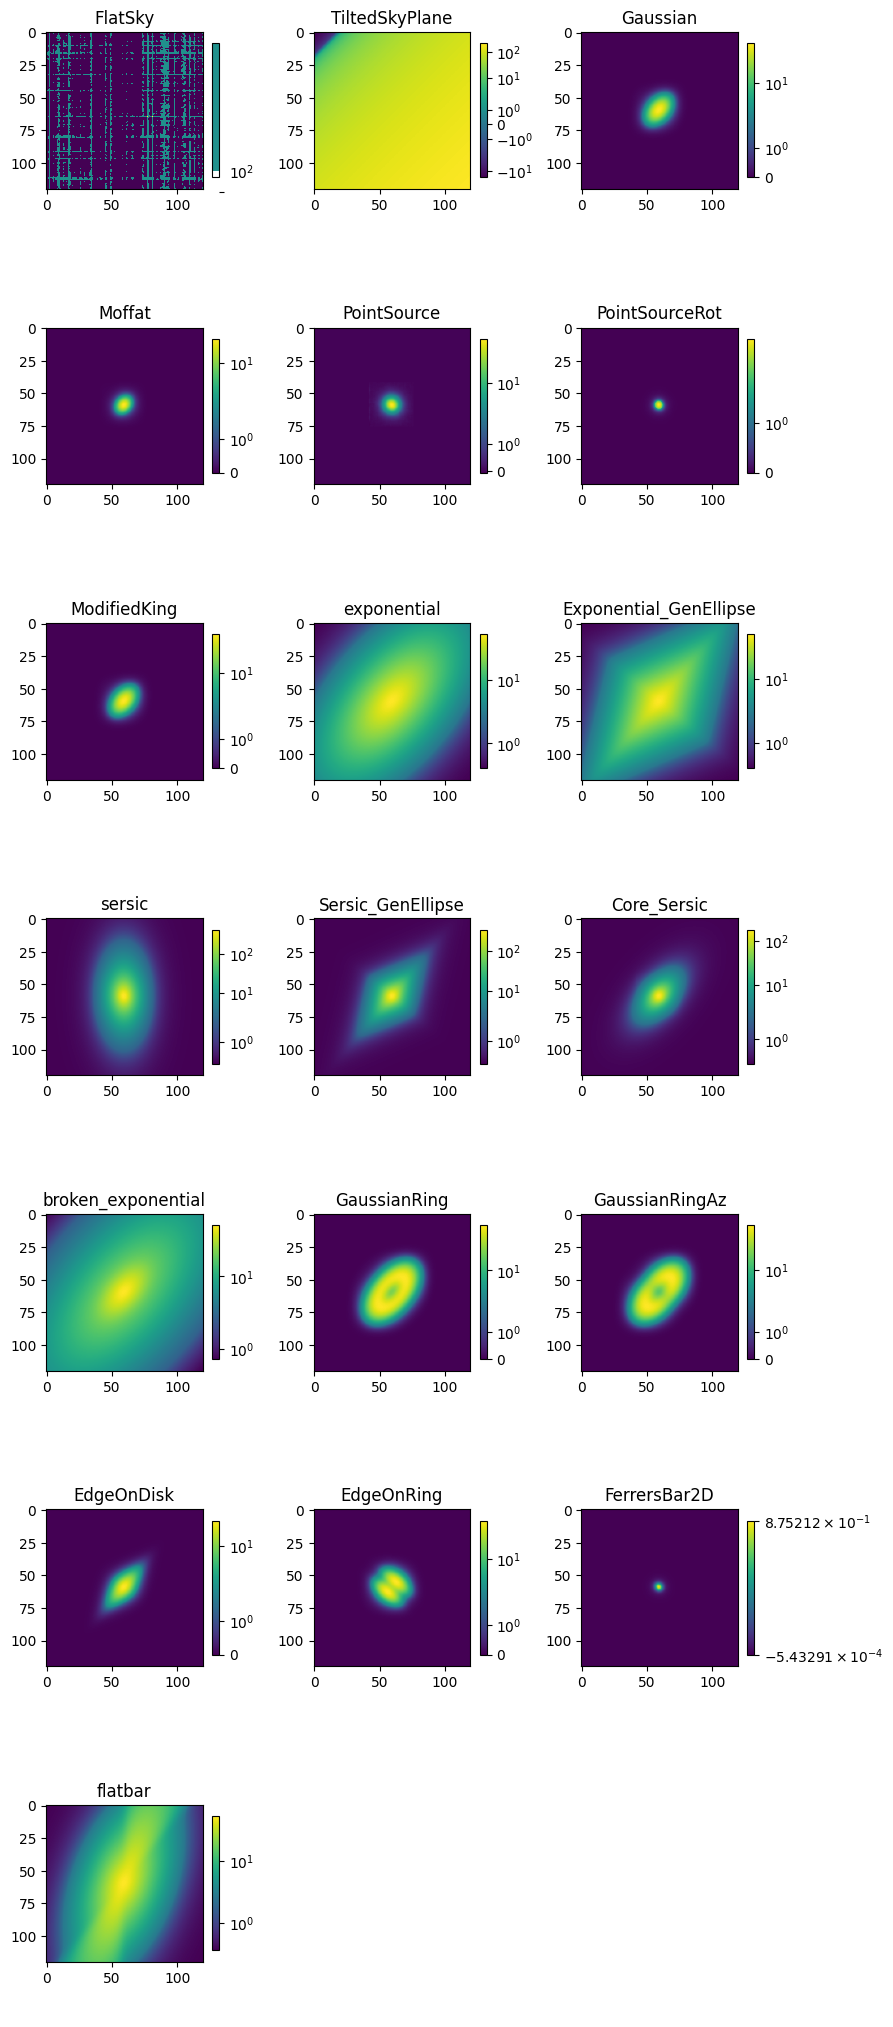

In [4]:
num_mod = len(models)
ncols=3
nrows=int(np.ceil(num_mod/ncols))
fig,ax = plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*3))
ax = ax.ravel()
modelnames = list(models.keys())
for i in range(num_mod):
    functionSetDict = {'X0': [60,0,120], 'Y0': [60,0,120], 'function_list':[models[modelnames[i]]]}
    modelDict = {'function_sets': [functionSetDict]}
    model_desc = pyimfit.ModelDescription.dict_to_ModelDescription(modelDict)
    imfitter = pyimfit.Imfit(model_desc,psf=epsf)
    model_im = imfitter.getModelImage(shape=(120,120))
    axim = ax[i].imshow(model_im,norm='symlog')
    fig.colorbar(axim, ax=ax[i], shrink=0.5)
    ax[i].set_title(modelnames[i][:-4])
fig.tight_layout();
[ax[-i].axis('off') for i in range(1,len(ax)-num_mod+1)]

ModelObjectWrapper: about to call _model.CreateModelImage()...


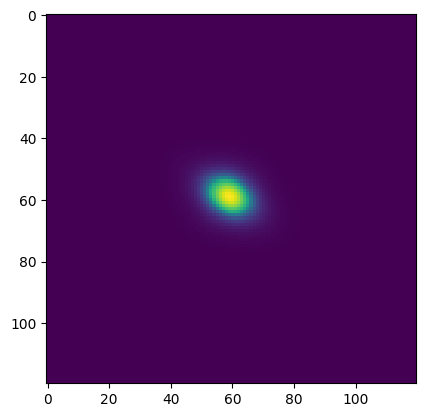

In [23]:
sersicParamsDict = {'PA': [120, 0, 360], 'ell_bulge': [0.5, 0, 1],
                    'n': [2, 0.5, 10],'I_e': [10.0, 0.0,200], 'r_e': [3, 0.0, 100]}
sersicDict = {'name': "Sersic", 'label': "bulge", 'parameters': sersicParamsDict}

functionSetDict = {'X0': [60,0,120], 'Y0': [60,0,120], 'function_list':[sersicDict]}
modelDict = {'function_sets': [functionSetDict]}
model_desc = pyimfit.ModelDescription.dict_to_ModelDescription(modelDict)
imfitter = pyimfit.Imfit(model_desc,psf=epsf)
model_im = imfitter.getModelImage(shape=(120,120))
plt.imshow(model_im,norm='symlog')